In [16]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt #use matplotlib for plotting with inline plots
%matplotlib inline

# Data Exploration
Iris data: Classify types of Iris flowers (setosa, versicolor, or virginica) based on the flower sepals and petal leave sizes.

The dataset contain 
- 4 features: Petal Length , Petal Width , Sepal Length , Sepal width 
- 3 classes: Iris setosa, Iris virginica and Iris versicolor

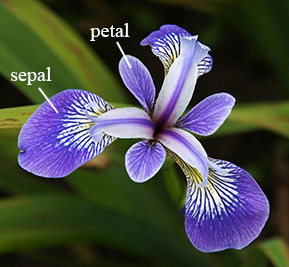

In [17]:
iris=np.genfromtxt("data/iris.txt",delimiter=None)
print("Shape of data: {}".format(iris.shape))
print("First 5 rows:\n{}".format(iris[:5]))


Shape of data: (148, 5)
First 5 rows:
[[ 4.9400593   3.081924    1.4644697   0.27530531  0.        ]
 [ 4.7738176   3.2812362   1.3564281   0.2088531   0.        ]
 [ 4.620137    3.1387625   1.5276568   0.27594034  0.        ]
 [ 5.0774442   3.6684541   1.4986909   0.23158353  0.        ]
 [ 5.415624    3.9942807   1.7762706   0.40472913  0.        ]]


In [3]:
# assign label and features
Y=iris[:,-1]
X=iris[:,0:-1]
m,n=X.shape

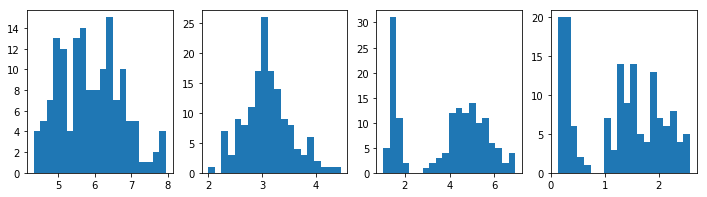

In [18]:
plt.rcParams['figure.figsize']=(12.0,3.0)
fig,ax=plt.subplots(1,4)
for i in range(n):
    ax[i].hist(X[:,i],bins=20)
plt.rcParams['figure.figsize']=(6.0,4.0)


## Statistics of the data

In [5]:
#mean
print ('Mean:', np.mean(X,axis=0))

#variance and standard deviation
print ('Var: ', np.var(X,axis=0))
print ('Std: ', np.std(X,axis=0))

Mean: [ 5.90010376  3.09893092  3.81955484  1.25255548]
Var:  [ 0.694559    0.19035057  3.07671634  0.57573564]
Std:  [ 0.83340207  0.43629184  1.75405711  0.75877246]


In [21]:
#e. normalisasi mean dan variance (zero mean dan unit variance)
Xn =  (X - np.mean(X,axis=0) ) / np.std(X,axis=0)
print ('Normalisasi Mean:', np.mean(Xn,axis=0))
print ('Normalisasi Var:', np.var(Xn,axis=0))

Normalisasi Mean: [ -7.70404761e-16   2.96759614e-15   8.38668474e-16   6.34627486e-16]
Normalisasi Var: [ 1.  1.  1.  1.]


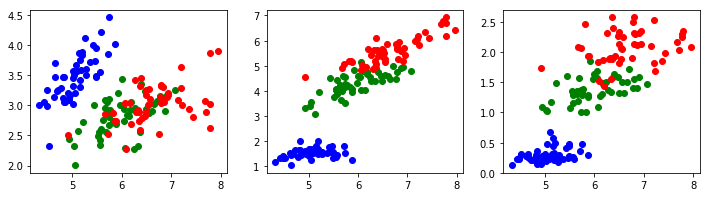

In [19]:
#Scatter plot for features pairs (1,2), (1,3), dan (1,4)
plt.rcParams['figure.figsize'] = (12.0, 3.0)
fig,ax = plt.subplots(1,3)
colors = ['b','g','r']
for i in range(1,n):
    for c in np.unique(Y):
        ax[i-1].plot( X[Y==c,0], X[Y==c,i], 'o', color=colors[int(c)] )
        


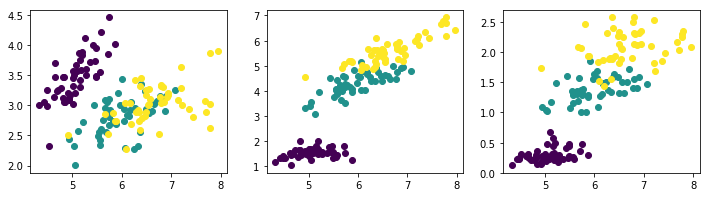

In [8]:
# or using function in mltools
plt.rcParams['figure.figsize'] = (12.0, 3.0)
fig,ax = plt.subplots(1,3)
for i in range(1,n):
    ml.plotClassify2D(None, X[:,[0,i]],Y,axis=ax[i-1])

# K-NN Prediction

In [9]:
X,Y = iris[:,0:4], iris[:,4]
X,Y = ml.shuffleData(X,Y)

## Training and testing data
To evaluate our classifier, we need to test it on unseen data.  
`train_test_split`: splits data randomly in 75% training and 25% test data.

In [10]:
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y, .75)

# or using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris[:,0:4], iris[:,4],random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (111, 4)
y_train shape: (111,)
X_test shape: (37, 4)
y_test shape: (37,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

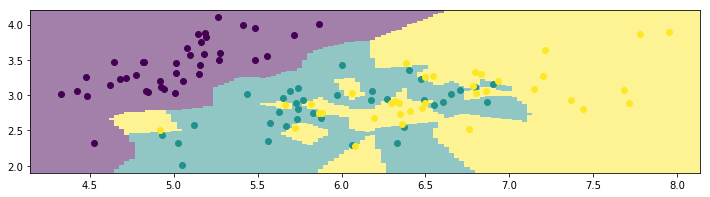

In [12]:
#or using mltools
knn2 = ml.knn.knnClassify()
knn2.train(Xtr[:,0:2],Ytr)
knn2.K = 1
ml.plotClassify2D(knn2, Xtr[:,0:2],Ytr)


#### Prediction on new data

In [13]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn1.predict(X_new)
print('Prediction: ',prediction)

Prediction:  [ 0.]


#### Evaluate on test data

## Exercises

Try evaluate k-NN with various k. And see the effect on the training and test error

## kNN: Strengths, weaknesses and parameters
* There are two important hyperparameters:
    * n_neighbors: the number of neighbors used
    * metric: the distance measures used
        * Default is Minkowski (generalized Euclidean) distance.
* Easy to understand, works well in many settings
* Training is very fast, predicting is slow for large datasets
* Bad at high-dimensional and sparse data (curse of dimensionality)